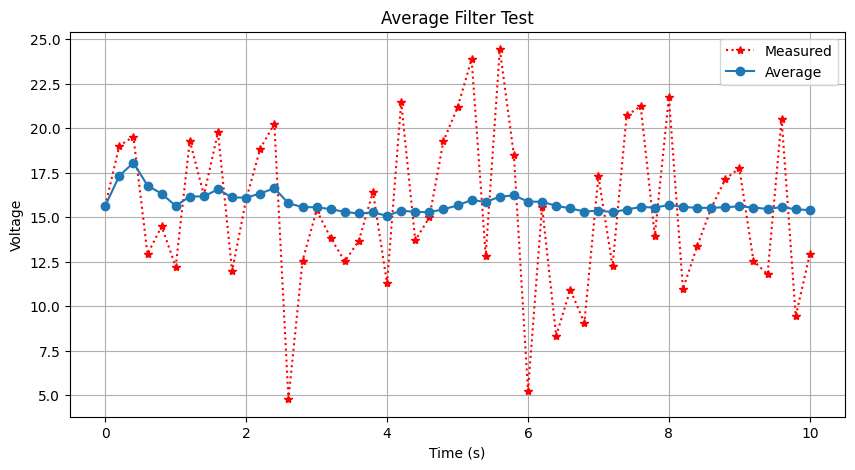

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat


# ========================================
# AvgFilter.m 대응 (persistent 기능 재현)
# ========================================
def AvgFilter(x):
    # 함수 속성(attribute)을 사용해 persistent 변수를 구현
    if not hasattr(AvgFilter, "firstRun"):
        AvgFilter.firstRun = True
        AvgFilter.prevAvg = 0.0
        AvgFilter.k = 1

    # 첫 실행이면 초기화
    if AvgFilter.firstRun:
        AvgFilter.firstRun = False

    alpha = (AvgFilter.k - 1) / AvgFilter.k
    avg = alpha * AvgFilter.prevAvg + (1 - alpha) * x

    AvgFilter.prevAvg = avg
    AvgFilter.k += 1

    return avg


# ========================================
# GetVolt.m 대응
# ========================================
def GetVolt():
    w = 0 + 4 * np.random.randn()   # randn(1,1) 그대로 대응
    z = 14.4 + w
    return z


# ========================================
# TestAvgFilter.m 대응
# ========================================
def main():
    dt = 0.2
    t = np.arange(0, 10 + dt, dt)
    Nsamples = len(t)

    Avgsaved = np.zeros(Nsamples)
    Xmsaved = np.zeros(Nsamples)

    for k in range(Nsamples):
        xm = GetVolt()
        avg = AvgFilter(xm)

        Avgsaved[k] = avg
        Xmsaved[k] = xm

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(t, Xmsaved, 'r:*', label="Measured")
    plt.plot(t, Avgsaved, 'o-', label="Average")
    plt.legend()
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage")
    plt.title("Average Filter Test")
    plt.grid(True)
    plt.show()


if __name__ == "__main__":
    main()

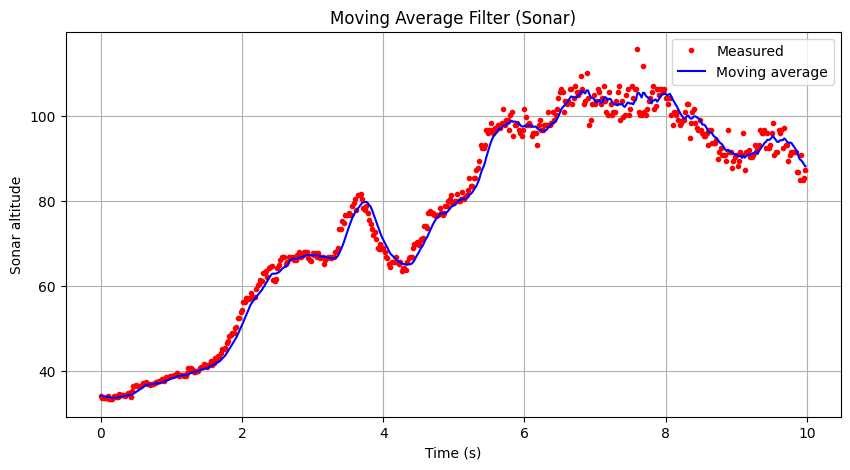

In [ ]:
# ========================================
# MovingAvgFilter.m 대응
# ========================================
def MovAvgFilter(x):
    # MATLAB의 persistent 변수 역할: 함수 attribute 사용
    if not hasattr(MovAvgFilter, "initialized"):
        MovAvgFilter.initialized = True
        MovAvgFilter.n = 10
        # 길이 n+1짜리 버퍼를 x로 초기화
        MovAvgFilter.xbuf = np.ones(MovAvgFilter.n + 1) * x
        MovAvgFilter.prevAvg = x

    # xbuf를 한 칸씩 왼쪽으로 밀기 (FIFO)
    # for 문 대신 슬라이싱으로 구현
    MovAvgFilter.xbuf[:-1] = MovAvgFilter.xbuf[1:]
    # 마지막 칸에 새 입력 x 저장
    MovAvgFilter.xbuf[-1] = x

    # avg = prevAvg + (x - xbuf(1)) / n
    oldest = MovAvgFilter.xbuf[0]
    avg = MovAvgFilter.prevAvg + (x - oldest) / MovAvgFilter.n

    MovAvgFilter.prevAvg = avg
    return avg


# ========================================
# GetSonar.m 대응
# ========================================
def GetSonar():
    if not hasattr(GetSonar, "initialized"):
        GetSonar.initialized = True
        # SonarAlt.mat 파일에서 sonarAlt 벡터 로드
        data = loadmat("SonarAlt.mat")
        GetSonar.sonarAlt = np.array(data["sonarAlt"]).flatten()
        GetSonar.k = 0  # 파이썬은 0부터 시작

    h = GetSonar.sonarAlt[GetSonar.k]
    GetSonar.k += 1
    return h


# ========================================
# TestMovAvgFilter.m 대응 (메인 부분)
# ========================================
def main():
    Nsamples = 500
    Xsaved = np.zeros(Nsamples)
    Xmsaved = np.zeros(Nsamples)

    for k in range(Nsamples):
        xm = GetSonar()
        x = MovAvgFilter(xm)

        Xsaved[k] = x
        Xmsaved[k] = xm

    dt = 0.02
    t = np.arange(0, Nsamples * dt, dt)

    plt.figure(figsize=(10, 5))
    plt.plot(t, Xmsaved, 'r.', label="Measured")
    plt.plot(t, Xsaved, 'b', label="Moving average")
    plt.legend()
    plt.xlabel("Time (s)")
    plt.ylabel("Sonar altitude")
    plt.title("Moving Average Filter (Sonar)")
    plt.grid(True)
    plt.show()


# 주피터 노트북에서도 이 셀을 실행하면 바로 main()이 돌도록
if __name__ == "__main__":
    main()